In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
Nbig = int(1e6)
#Nbig = 10
Jot = 1.0
err = 1e-6

beta = 1.0
mu = 0
g = 10.0
J = 10.0
phase = np.pi/2
lamb = 5.0 * np.exp(1.0j * phase)
alpha = 1.0
r = 0.1
kappa = 1 


omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

In [3]:
GDtau = np.ones(Nbig)
GODtau = np.ones(Nbig)
DDtau = np.ones(Nbig)
DODtau = np.ones(Nbig)

itern = 0
diff = 1
x = 0.5

while(diff>err):
    itern+=1
    diffold = diff
    
    oldGDtau = 1.0*GDtau
    oldGODtau = 1.0*GODtau
    oldDDtau = 1.0*DDtau
    oldDODtau = 1.0*DODtau
    
    oldGDomega = Time2FreqF(oldGDtau,Nbig,beta)
    oldGODomega = Time2FreqF(oldGODtau,Nbig,beta)
    oldDDomega = Time2FreqB(oldDDtau,Nbig,beta)
    oldDODomega = Time2FreqB(oldDODtau,Nbig,beta)
    
    SigmaDtau = kappa * (g**2) * DDtau * GDtau
    SigmaODtau = kappa * (g**2) * DODtau * GODtau
    PiDtau = -1.0 * g**2 * GDtau * GDtau[::-1]
    PiODtau = -1.0 * g**2 * GODtau * GODtau[::-1]
    
    SigmaDomega = Time2FreqF(SigmaDtau,Nbig,beta)
    SigmaODomega = Time2FreqF(SigmaODtau,Nbig,beta)
    PiDomega =  Time2FreqB(PiDtau,Nbig,beta)
    PiODomega = Time2FreqB(PiODtau,Nbig,beta)
    
    detGmat = (1j*omega - mu - SigmaDomega)**2 + (np.abs(lamb)+SigmaODomega)**2
    detDmat = (nu**2 + r - PiDomega)**2 + (J + PiODomega)**2
    
    GDomega = x*((1j*omega - mu - SigmaDomega)/detGmat) + (1-x)*oldGDomega
    GODomega = x*((np.abs(lamb) + SigmaODomega)/detGmat) + (1-x)*oldGODomega
    DDomega = x*((nu**2 + r - PiDomega)/detDmat) + (1-x)*oldDDomega
    DODomega = x*((J + PiODomega)/detDmat) + (1-x)*oldDODomega
    
    GDtau = Freq2TimeF(GDomega,Nbig,beta)
    GODtau = Freq2TimeF(GODomega,Nbig,beta)
    DDtau = Freq2TimeB(DDomega,Nbig,beta)
    DODtau = Freq2TimeB(DODomega,Nbig,beta)
    
    diff = (1/Nbig) * np. sqrt(np.sum((np.abs(GDtau-oldGDtau))**2 + (np.abs(GODtau-oldGODtau))**2 + 
                                      (np.abs(DDtau-oldDDtau))**2 + (np.abs(DODtau-oldDODtau))**2))
    
    if diff>diffold:
        x/=2


    
print("iter = ",itern," , diff = ", diff)
    

iter =  22  , diff =  9.443641710285867e-07


Text(0.5, 1.0, 'GD($\\tau$), $\\beta$ = 10, g=1 , J = $\\lambda$ = 0 ')

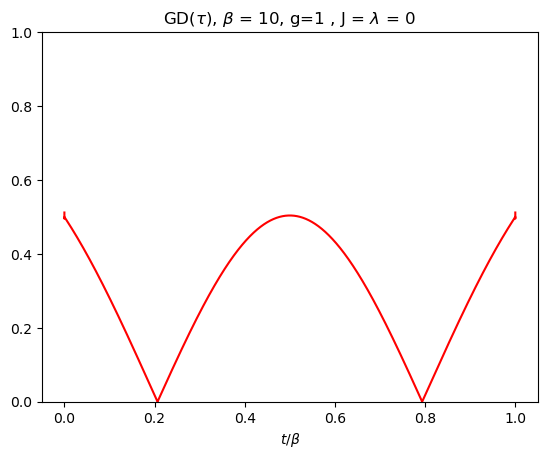

In [4]:
val = 1

ax = plt.plot(tau[val:-val]/beta,np.abs(GDtau[val:-val]),'r')

plt.xlabel(r'$t/\beta$')
plt.ylim([0,1])
plt.title(r"GD($\tau$), $\beta$ = 10, g=1 , J = $\lambda$ = 0 ")
#plt.savefig('FirstPass.pdf')

(0.0, 0.2)

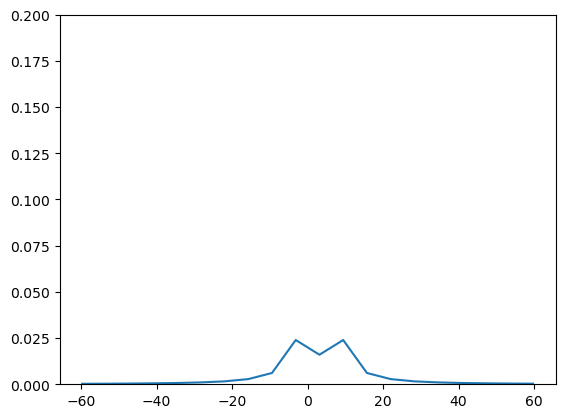

In [5]:
val = Nbig//2 - 10
plt.plot(omega[val:-val], np.abs(DDomega)[val:-val])
plt.ylim(0,0.2)

In [6]:
DDtau

array([0.09609542+1.18506929e-12j, 0.09609487+9.82418401e-13j,
       0.0960944 +1.18505468e-12j, ..., 0.0960944 +8.73378370e-12j,
       0.09609487-2.74309708e-12j, 0.09609542-1.46253440e-11j])

(0.0, 1.0)

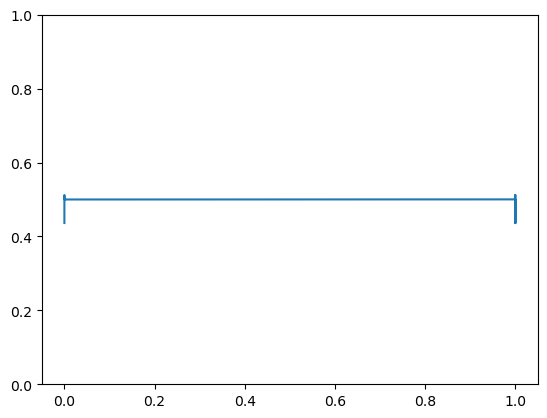

In [12]:
testg0tau = Freq2TimeF(-1/(1.0j*omega),Nbig,beta)
plt.plot(tau,testg0tau)
plt.ylim(0,1)